<a href="https://colab.research.google.com/github/juanmed/coursera_tensorflow/blob/master/ex2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a simple Convolutional Neural Network

In this notebook we will create a simple neural network using TensorFlow. The purpose is to get a better understanding of how convolutional layers are added to neural networks from a practical point of view. This notebooks uses the FMNIST dataset.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy as np
import time
import random

Let's get the [FMNIST dataset](https://github.com/zalandoresearch/fashion-mnist). Luckily this dataset is included withing tensorflow keras. This dataset includes 60,000 training images, and 10,000 test images.

In [3]:
# load fmnist dataset
fmnist = keras.datasets.fashion_mnist
# get train, tests sets
(train_img, train_lbl), (test_img, test_lbl) = fmnist.load_data()
print("Train images: len {} type {}".format(len(train_img), type(train_img)))
print("Train labels: len {} type {}".format(len(train_lbl), type(train_lbl)))
print("Test  images: len {} type {}".format(len(test_img), type(test_img)))
print("Test  labels: len {} type {}".format(len(test_lbl), type(test_lbl)))
classes = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


4423680/4422102 [==============================] - 0s 0us/step
Train images: len 60000 type <class 'numpy.ndarray'>
Train labels: len 60000 type <class 'numpy.ndarray'>
Test  images: len 10000 type <class 'numpy.ndarray'>
Test  labels: len 10000 type <class 'numpy.ndarray'>


Image size: (28, 28)
Label: 2
This is a pullover
Total labels: [0 1 2 3 4 5 6 7 8 9]


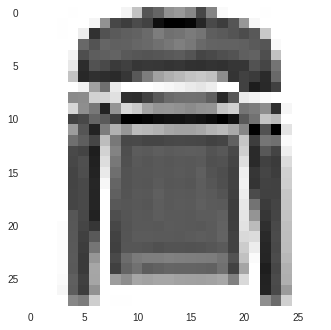

In [4]:
# See input data dimensions
train_sample = 5
print("Image size: {}".format(train_img[train_sample].shape))
print("Label: {}".format(train_lbl[train_sample]))
print("This is a {}".format(classes[train_lbl[train_sample]]))
print("Total labels: {}".format(np.unique(train_lbl)))
plt.imshow(train_img[train_sample])
plt.grid(False)
plt.show()


## Normalize dataset 

Neural networks work better with data that is in the range (0,1). Since the maximum pixel value is exactly 255, we will all the values in the image by 255. Also, we need to reformat the data in order to be compatible with the way the network receives it and the training is performed. 

In [0]:
# reshape and normalize set
train_img = train_img.reshape(60000, 28, 28, 1)/255.0
test_img = test_img.reshape(10000, 28, 28, 1)/255.0

## Neural Network 

The neural network definition is nothing more than a list of layers. Each element in the list is an object coming from the keras.layers package. To define a Convolutional layer, we only need to create a new Conv2D object, and pass it the following arguments: number of kernels, size of the kernels, activation function, and the input data shape.

Usually, but now always, convolutions are followed by Max Pooling layers, in order to reduce dimensions of the image. Again, using tools like tensorflow is easy and we only need to create a MaxPooling2D layer object and pass it the size: 2x2 in this case.

Finally, we flatten the image, which is nothing more than putting together all the rows of the image one after the order, in order to former a "long" or "flattened" version of the incoming image. This will allow us to reduce the features to finish up with the output layer which has only 10 neurons, each of which will be responsible for classifying each of the classes. This means that the final layer MUST as many neurons as there are classes in the dataset.

In [6]:
model = keras.models.Sequential([keras.layers.Conv2D(1, (3,3), activation=tf.nn.relu, input_shape = (28, 28, 1)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(100, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax) ])


Instructions for updating:
Colocations handled automatically by placer.


## Optimizer and Loss

We will use the adam optimizer, but others like 'SGD' are also possible. As loss metric the sparse categorical cross entropy is used.

In [26]:
# Print network
model.summary()

# Compile network: define optimizer, loss and display metrics
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 169)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               17000     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 18,020
Trainable params: 18,020
Non-trainable params: 0
_________________________________________________________________


## Training

Now that we have defined all layers of the network and the metrics we will use for optimizing the weights, we can proceed to train. Training for more epochs can increase the accuracy of the network, at the expense of longer training times and the risk of overfitting.

In [27]:
# Train
t1 = time.monotonic()
model.fit(train_img, train_lbl, epochs = 20)
t2 = time.monotonic()
print("Training time: {}".format(t2-t1))

Epoch 1/20
60000/60000 [==============================] - 17s 277us/sample - loss: 0.4143 - acc: 0.8512
Epoch 2/20
60000/60000 [==============================] - 17s 281us/sample - loss: 0.3775 - acc: 0.8650
Epoch 3/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3520 - acc: 0.8731
Epoch 4/20
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3332 - acc: 0.8788
Epoch 5/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.3172 - acc: 0.8854
Epoch 6/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3037 - acc: 0.8899
Epoch 7/20
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2926 - acc: 0.8943
Epoch 8/20
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2821 - acc: 0.8991
Epoch 9/20
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2728 - acc: 0.9015
Epoch 10/20
60000/60000 [==============================] - 17s 2

## Evaluation

Since the dataset contains a 10,000 evaluation sub dataset, we can use these to evaluate the generalization of our network. We want a network that has high accuracy on the training and test datasets. Even if the training accuracy is very high, the network might fail when presented with unseen images. In this sense, evaluation with unseen images is very important.

In [28]:
# Evaluate
print("Test set results")
test_params = model.evaluate(test_img, test_lbl)
print(test_params)

Test set results
10000/10000 [==============================] - 2s 174us/sample - loss: 0.3661 - acc: 0.8794
[0.36613357206583025, 0.8794]


## Prediction

Now that we have an idea of the performance of our network, we can use to make predictions. In this case, a prediction is the classification result obtained after passing an input image through the network. The network will output 10 values, each of which corresponds to each class. The class with the highest value corresponds to the class the network predicts the image belongs to.

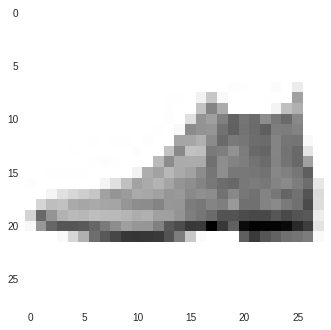

Prediction: ankle boot with 1.000% confidence, 
Ground Truth: ankle boot


In [29]:
# Predict a single image
test_img_index = 0
img = test_img[test_img_index].reshape(28,28)*255
plt.imshow(img)
plt.grid(False)
plt.show()


img = img.reshape(1,28,28,1)   # we need to reshape it for the network
output = model.predict(img)[0]
predicted_class = np.where(output == max(output))[0][0]
print("Prediction: {} with {:.3f}% confidence, \nGround Truth: {}".format(classes[predicted_class],output[predicted_class], classes[test_lbl[test_img_index]]))

## Layer Output Visualization

In order to get a feeling of what the neural network is doing internally, it is very useful to see the output of each layer, as the image passes through the network. This gives a visual idea of what are the features that the network is extracting and that are used for classifying the image. If the network is using features that visualy do not correspond to the object of interest, one can correct the network to "focus" on features that do correspond to the object we are interested on classifying.

In [30]:
# Visualize output for each layer 

# extract outputs for each layer
layer_outputs = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]
layer_names.append('Original Image')
print("Layer Outputs: len {}".format(len(layer_outputs)))
for i, output in enumerate(layer_outputs):
	print("For {} Output {} shape {}".format(layer_names[i], i,output.shape))

Layer Outputs: len 5
For conv2d Output 0 shape (?, 26, 26, 1)
For max_pooling2d Output 1 shape (?, 13, 13, 1)
For flatten Output 2 shape (?, 169)
For dense Output 3 shape (?, 100)
For dense_1 Output 4 shape (?, 10)


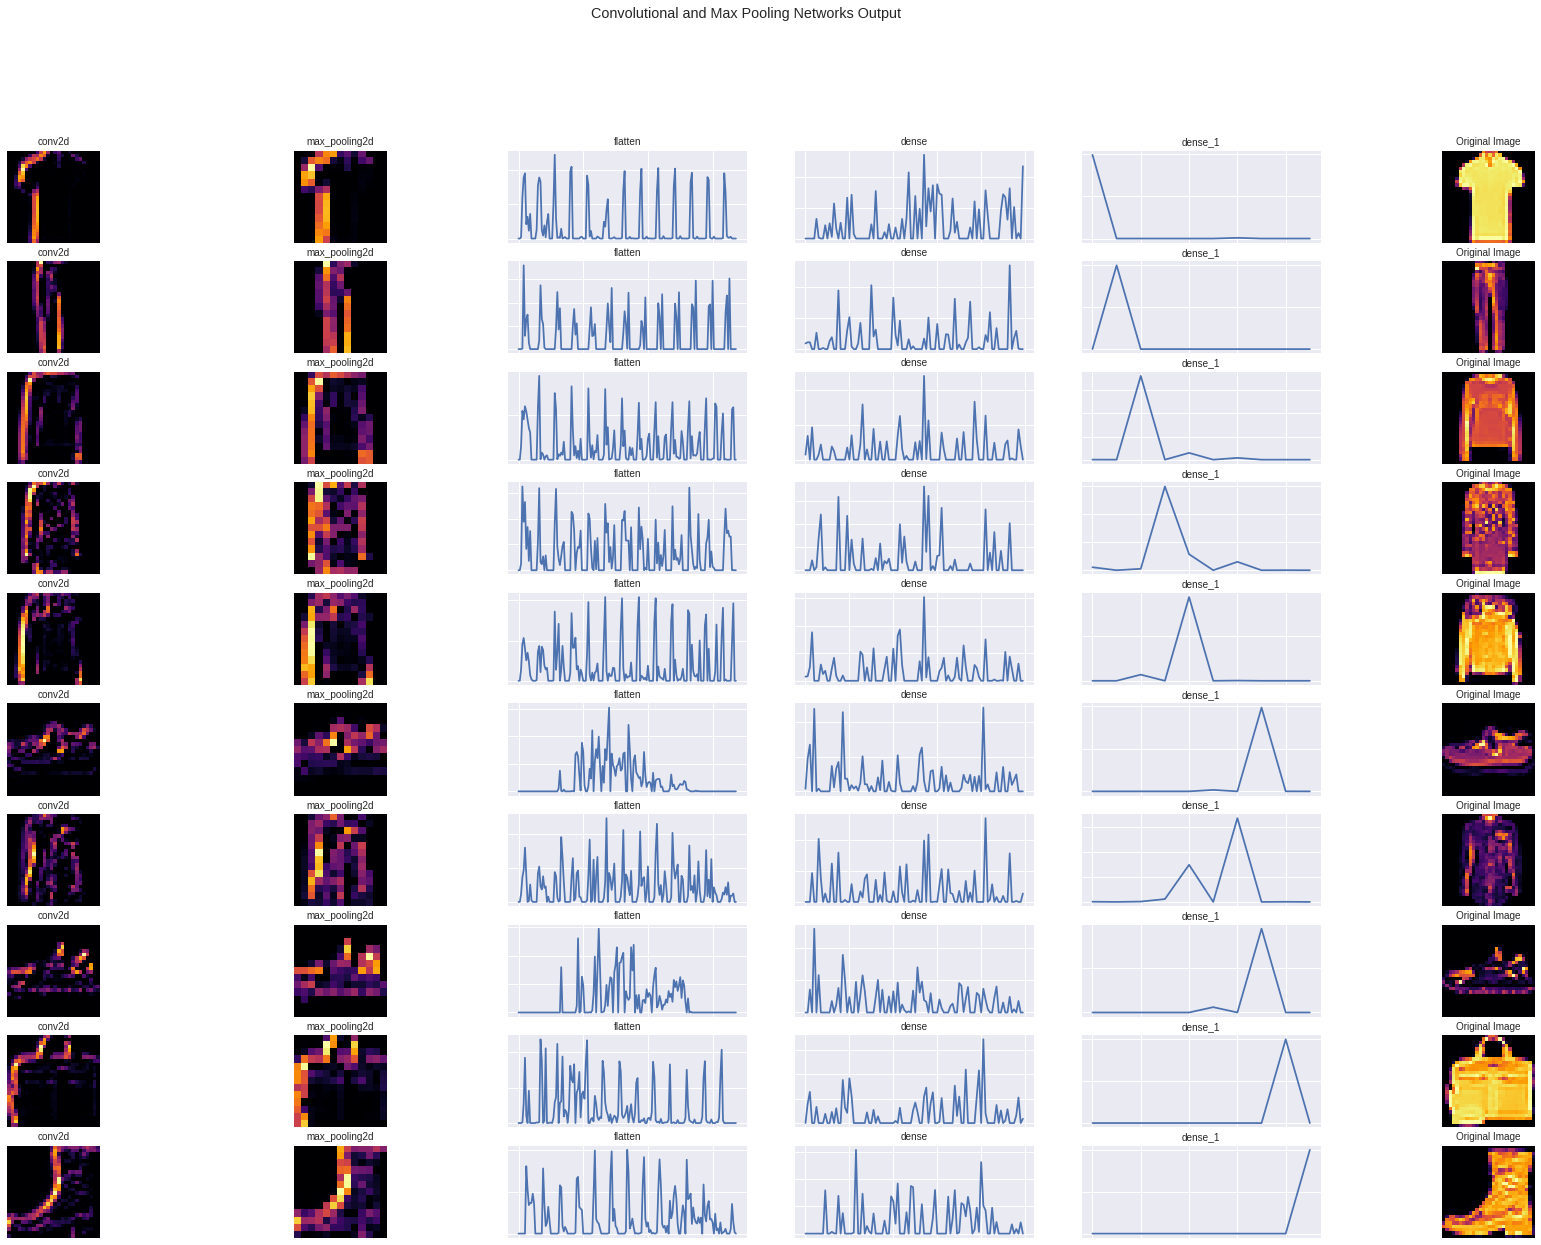

In [31]:
# Define a network with the same layers
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

fig1 = plt.figure(figsize=(30, 20))
fig1.suptitle(" Convolutional and Max Pooling Networks Output")
axarr = fig1.subplots(len(classes),len(layer_outputs)+1)  # add 1 because we will also plot original image

# We will visualize the output of each layer for each class
for clothe_type in np.unique(test_lbl):
  
  # find indices where current clothe type appears
  indices = np.where( test_lbl == clothe_type)
  index = random.choice(indices[0])
  
  # forward pass the image
  outputs = activation_model.predict(test_img[index].reshape(1,28,28,1))
  outputs.append(test_img[index].reshape(1,28,28,1))
  
  # draw all the outputs for current clothe type
  for i, output in enumerate(outputs):
    
    if(len(output.shape) == 4):  
      # if convolutional network, show pictures
      axarr[clothe_type, i].imshow(output[0,:,:,0], cmap='inferno')
      axarr[clothe_type, i].grid(False)
    else:
      # if dense layer, plot line
      axarr[clothe_type, i].plot(output[0])
      
    # set title
    axarr[clothe_type, i].set_title(layer_names[i], fontsize='small')
    axarr[clothe_type, i].tick_params(which='both', bottom = False, left=False, labelbottom=False, labelleft=False)
    
    
plt.show()
  